<a href="https://colab.research.google.com/github/in123-new/machine-learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Partie 1**

# Methode 01

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

In [ ]:
x,y=make_regression(n_samples=10,n_features=1,noise=3)

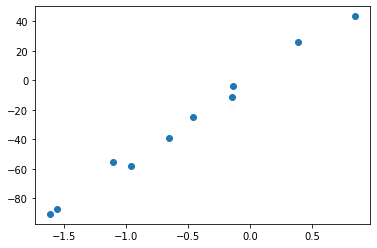

In [ ]:
plt.scatter(x,y)

In [ ]:
mean_x=np.mean(x)
mean_y=np.mean(y)

In [ ]:
var_x=np.var(x)
var_y=np.var(y)

In [ ]:
std1=np.std(x)
std2=np.std(y)

In [ ]:
cov=np.cov(x,y,rowvar=False)

In [ ]:
corr=np.corrcoef(x,y,rowvar=False)

In [ ]:
b1=cov[0,1]/var_x
b0=mean_y-(mean_x*b1)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


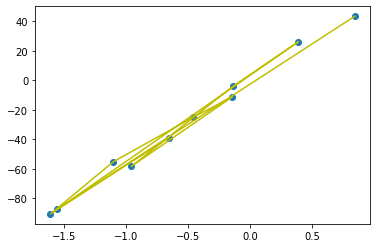

In [ ]:
plt.plot(x,y,color='Y')
plt.scatter(x,y)

In [ ]:
  theta=np.array([b1,b0])
  theta

array([61.83828998,  3.16389023])

In [ ]:
F=b0+b1*x
F=F.flatten()
F

array([-37.40878179, -96.33864406, -65.01835277, -25.21488709,
        -5.73599585, -55.98903544,  -5.38184506,  27.19155589,
       -92.87643327,  55.3237247 ])

# **Methode 2**

In [ ]:
def regression_mmc_fit(x,y) :
    x=x.reshape((1,10))
    b0
    b1 
    theta
    return theta

In [ ]:
def prediction_mmc (x,theta) :
   F=b0+x*b1  
   F=F.flatten()
   return F

In [ ]:
def prediction_mmc (a,theta) :
   y=theta[0]+a*theta[1]  
   y=y.flatten()
   return y

In [ ]:
theta=regression_mmc_fit(x,y)
theta

array([61.83828998,  3.16389023])

In [ ]:
x1=np.array([-1,-2,-3,0,1,2,3])
y1=theta[0]+   x1*(theta[1])
plt.plot(x1,y1)
plt.scatter(x,y)

In [ ]:
y=y.reshape(y.shape[0],1)
theta=np.random.randn(2,1)
x1=np.hstack((x,np.ones(x.shape)))
def model(x1,theta):
  matrice=x1.dot(theta)  
  return matrice

In [ ]:
def grad(x1,Y,theta):
  m=len(y)
  return  x1.T.dot(model(x1,theta)-Y)*(1/m)
  grad=grad(x1,y,theta)
  grad

In [ ]:
def descente_grad(x1,Y,theta,pas,iterations):
    for i in range(iterations):
        theta=theta-pas*grad(x1,Y,theta)
    return theta


In [ ]:
theta=descente_grad(x1,y,theta,0.001,500000)
theta

array([[55.65446098],
       [-0.16698574]])

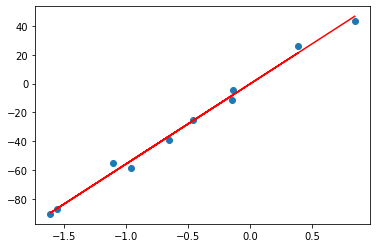

In [ ]:
plt.scatter(x1[:,0],y)
plt.plot(x1[:,0],theta[0]*X[:,0]+theta[1],c='red')



> Le coefficient de determinantion R²:



In [ ]:
from sklearn.metrics import r2_score
R = r2_score(y, F)
print('R^2 =', R )

R^2 = 0.98062051923073


In [ ]:
from sklearn.linear_model import LinearRegression
Regression_model=LinearRegression()
Regression_model.fit(x,y)
R=Regression_model.score(x,y)
print(f"R^2 =: {R}")

R^2 =: 0.9928782757211141


# **Partie 2**

**Régression multiple**

In [ ]:
from sklearn.datasets import make_regression
X,Y =make_regression(n_samples=100,n_features=5,noise=3)


1.   Solution 1 




In [ ]:
#ajouter a x une colonne remplie de 1 
x=np.concatenate((x,np.ones((x.shape[0],1))),axis=1)

In [ ]:
a0= np.matmul(X.T,X) 
a0_inv= np.linalg.inv(a0)
a1 = np.matmul(a0_inv,X.T)
B=np.matmul(a1,Y)
print(B)

[91.85561895  9.55245278 53.00168546 53.1243694  36.76519458]



2.   Solution 2



In [ ]:
from sklearn.datasets import make_regression
X,Y =make_regression(n_samples=100,n_features=5,noise=3)

In [ ]:
def descent_gradient_multi(X,y,theta,pas,iterations):
    X = np.c_[np.ones(X.shape[0]),X]
    n=len(X)
    for i in range(iterations):
        XT=np.transpose(X)
        theta=theta.reshape(X.shape[1],1) 
        ypred=np.matmul(X,theta)
        ypred=np.array(ypred) 
        error= ypred.flatten() 
        error=np.array(error) 
        grad=np.matmul(XT,error)
        grad=np.array(grad)
        grad=grad.reshape(X.shape[1],1)
        theta = theta - (pas/n) * grad
    return theta

In [ ]:
theta_1=np.random.rand(6)
theta_final=descent_gradient_multi(X,Y,theta_1,0.02,500)

In [ ]:
print("les valeur réelles sont ")
print(Y[1:5])
Y_predicted=np.matmul(np.c_[np.ones(X.shape[0]),X],theta_final)
Y_predicted=Y_predicted.flatten()
print("les valeur prédite sont ")
print(Y_predicted[1:5])

les valeur réelles sont 
[-33.18059136  94.91951688 132.95278851 161.4047873 ]
les valeur prédite sont 
[ 6.58541583e-05 -1.09778382e-04 -6.06942795e-05 -1.06006764e-04]


In [ ]:
corr_matrix = np.corrcoef(Y, Y_predicted)
corr = corr_matrix[0,1]
R = corr**2
print(f"R^2 =: {R}") 

R^2 =: 0.16275511319467


In [ ]:
from sklearn.linear_model import LinearRegression
Regression_model=LinearRegression()
Regression_model.fit(X,Y)
Regression_model.score(X,Y)

0.9992304668117487

**Les 2 R² sont assez proches**

In [ ]:
#Les 2 R² sont assez proches 